In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 98049447.78it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17349712.66it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29071681.55it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19360293.46it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]


(<PIL.Image.Image image mode=L size=28x28>, 5)

Label: 5


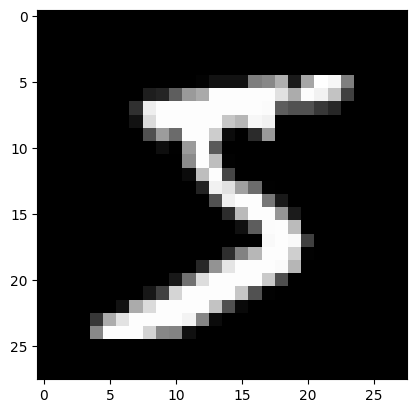

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 1, 0, 6, 9, 5, 9, 9, 3, 6, 7, 2, 4, 4, 4, 7, 4, 8, 7, 1, 9, 3, 8, 2,
        5, 3, 3, 7, 8, 3, 9, 8, 4, 1, 0, 2, 3, 9, 0, 8, 8, 6, 8, 5, 5, 7, 4, 1,
        2, 3, 6, 7, 4, 7, 9, 4, 3, 4, 9, 5, 3, 4, 1, 2, 4, 8, 7, 0, 4, 2, 1, 3,
        4, 7, 3, 2, 8, 0, 2, 5, 0, 5, 3, 6, 6, 8, 9, 6, 1, 1, 5, 7, 6, 3, 5, 0,
        9, 2, 1, 7, 2, 7, 7, 4, 4, 4, 7, 6, 7, 5, 4, 2, 3, 7, 2, 7, 0, 4, 1, 8,
        0, 1, 5, 7, 3, 6, 4, 3, 7, 5, 2, 0, 0, 0, 6, 6, 7, 3, 0, 4, 5, 0, 8, 1,
        2, 5, 7, 5, 4, 1, 6, 4, 8, 3, 0, 3, 8, 4, 8, 7, 8, 6, 9, 3, 8, 3, 3, 7,
        3, 5, 0, 0, 6, 4, 4, 9, 7, 9, 8, 9, 1, 6, 9, 7, 6, 2, 2, 3, 8, 3, 5, 9,
        6, 7, 6, 2, 9, 9, 2, 8, 8, 5, 4, 1, 6, 8, 8, 7, 8, 7, 0, 8, 7, 8, 2, 3,
        1, 3, 3, 7, 3, 5, 6, 4, 3, 3, 7, 7, 0, 3, 0, 6, 9, 3, 1, 7, 1, 3, 5, 0,
        6, 5, 1, 9, 0, 2, 7, 7, 7, 2, 4, 9, 5, 1, 1, 5])
torch.Size([256, 1, 28, 28])


RuntimeError: ignored

In [ ]:
images.shape

torch.Size([256, 1, 28, 28])

In [ ]:
images.reshape(256, 784).shape

torch.Size([256, 784])

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0068,  0.0151, -0.0309,  ..., -0.0299,  0.0203, -0.0197],
         [ 0.0204, -0.0247,  0.0004,  ..., -0.0196,  0.0178,  0.0021],
         [-0.0188, -0.0200, -0.0226,  ..., -0.0004,  0.0153,  0.0229],
         ...,
         [ 0.0147,  0.0246,  0.0167,  ...,  0.0271, -0.0327,  0.0167],
         [ 0.0338,  0.0074,  0.0307,  ..., -0.0079,  0.0302, -0.0226],
         [ 0.0129,  0.0114,  0.0336,  ..., -0.0344, -0.0164, -0.0316]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0140, -0.0321,  0.0158,  0.0130, -0.0147, -0.0188,  0.0236, -0.0165,
         -0.0235,  0.0229], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([256, 1, 28, 28])
outputs.shape :  torch.Size([256, 10])
Sample outputs :
 tensor([[-0.1640, -0.1751, -0.0640,  0.1756,  0.2057,  0.0027,  0.1056,  0.0901,
         -0.0788, -0.1691],
        [-0.0470, -0.1325,  0.0954,  0.0583,  0.0529, -0.0551, -0.3411,  0.2821,
          0.2230, -0.4442]])


In [ ]:
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0847, 0.0837, 0.0936, 0.1189, 0.1226, 0.1000, 0.1109, 0.1092, 0.0922,
         0.0842],
        [0.0962, 0.0883, 0.1109, 0.1069, 0.1063, 0.0954, 0.0717, 0.1337, 0.1260,
         0.0647]])
Sum:  1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 7, 7, 7, 7, 7, 2, 2, 7, 5, 0, 7, 4, 7, 8, 4, 7, 7, 5, 5, 7, 7, 3, 7,
        7, 0, 7, 7, 7, 8, 7, 7, 7, 5, 4, 7, 3, 7, 7, 7, 3, 7, 7, 3, 7, 7, 7, 8,
        7, 4, 8, 7, 7, 5, 7, 3, 2, 5, 8, 3, 5, 5, 2, 5, 3, 7, 7, 5, 9, 4, 5, 8,
        7, 8, 7, 3, 8, 3, 7, 3, 7, 1, 7, 7, 5, 8, 7, 7, 7, 7, 0, 7, 4, 7, 4, 0,
        4, 5, 7, 0, 7, 7, 2, 2, 5, 9, 3, 2, 8, 7, 5, 3, 7, 5, 7, 6, 7, 7, 5, 7,
        8, 7, 7, 7, 8, 7, 2, 7, 7, 7, 8, 7, 7, 2, 7, 5, 8, 3, 0, 5, 5, 9, 7, 7,
        8, 7, 7, 3, 7, 5, 2, 3, 2, 4, 2, 6, 5, 8, 7, 2, 7, 3, 7, 2, 7, 7, 7, 3,
        7, 4, 8, 7, 2, 7, 5, 3, 7, 7, 0, 1, 7, 4, 7, 7, 3, 7, 8, 3, 5, 7, 2, 4,
        8, 3, 5, 2, 7, 8, 2, 7, 7, 7, 5, 7, 4, 5, 7, 3, 7, 7, 3, 7, 7, 2, 3, 7,
        2, 7, 7, 7, 7, 2, 7, 6, 3, 7, 7, 7, 7, 7, 7, 2, 3, 3, 7, 8, 3, 9, 7, 7,
        7, 3, 7, 0, 7, 7, 7, 0, 7, 7, 4, 3, 5, 7, 7, 4])
tensor([0.1226, 0.1337, 0.1839, 0.1438, 0.1989, 0.1262, 0.1239, 0.1322, 0.1283,
        0.1348, 0.1125, 0.1227, 0.1376, 0.1246, 0.1435, 0.1227,

In [ ]:
torch.sum(preds == labels)

tensor(28)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1094)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.306572437286377, 'val_acc': 0.09091796725988388}

In [ ]:
history1 = fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4658, val_acc: 0.7644
Epoch [1], val_loss: 1.3857, val_acc: 0.7750
Epoch [2], val_loss: 1.3157, val_acc: 0.7842
Epoch [3], val_loss: 1.2542, val_acc: 0.7912
Epoch [4], val_loss: 1.2000, val_acc: 0.7964
Epoch [5], val_loss: 1.1519, val_acc: 0.8028
Epoch [6], val_loss: 1.1090, val_acc: 0.8085
Epoch [7], val_loss: 1.0705, val_acc: 0.8117
Epoch [8], val_loss: 1.0359, val_acc: 0.8147
Epoch [9], val_loss: 1.0046, val_acc: 0.8189
Epoch [10], val_loss: 0.9761, val_acc: 0.8220
Epoch [11], val_loss: 0.9501, val_acc: 0.8266
Epoch [12], val_loss: 0.9263, val_acc: 0.8287
Epoch [13], val_loss: 0.9045, val_acc: 0.8303
Epoch [14], val_loss: 0.8843, val_acc: 0.8327
Epoch [15], val_loss: 0.8656, val_acc: 0.8344
Epoch [16], val_loss: 0.8482, val_acc: 0.8360
Epoch [17], val_loss: 0.8321, val_acc: 0.8371
Epoch [18], val_loss: 0.8170, val_acc: 0.8389
Epoch [19], val_loss: 0.8029, val_acc: 0.8399
Epoch [20], val_loss: 0.7897, val_acc: 0.8403
Epoch [21], val_loss: 0.7773, val_acc: 0.841

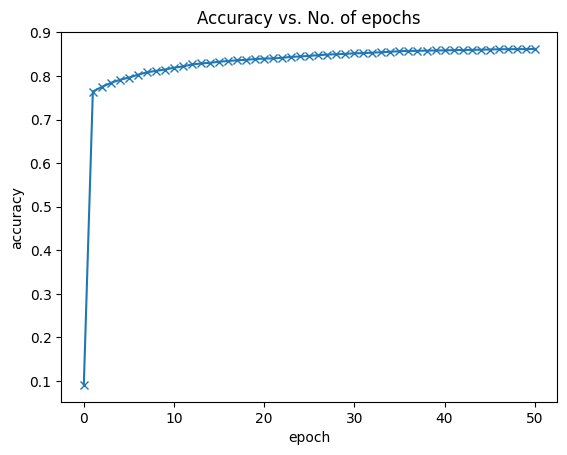

In [ ]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');